In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import OpenAEM


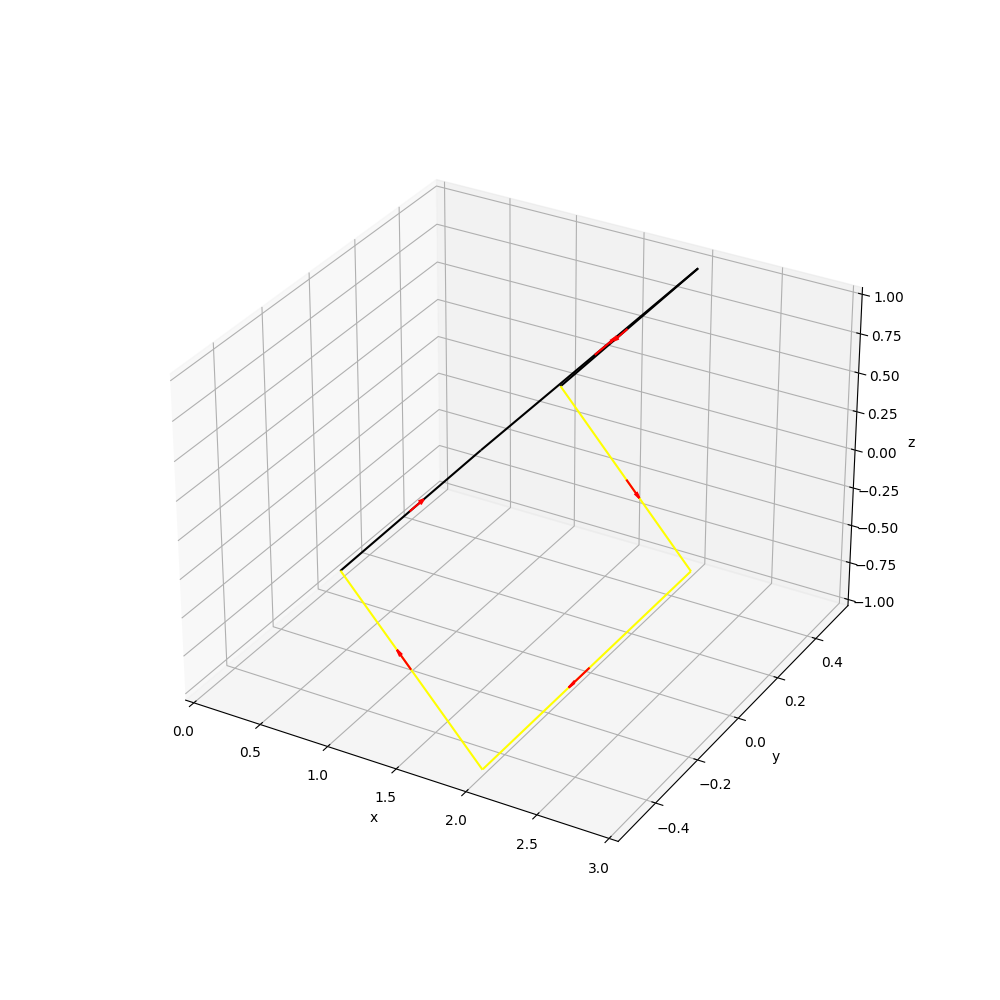

In [2]:
origin = np.array([1, 0, 0])
eddy = OpenAEM.Pi_Eddy(origin=origin)
eddy_mirror = eddy.create_mirror()
axs = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
eddy.plot(axs)
eddy_mirror.plot(axs, color='yellow')

axs.set_xlabel('x')
axs.set_ylabel('y')
axs.set_zlabel('z')
axs.set_xlim(0, 3)
axs.tick_params(direction='in')

ValueError: non-broadcastable output operand with shape (3,1) doesn't match the broadcast shape (3,3)

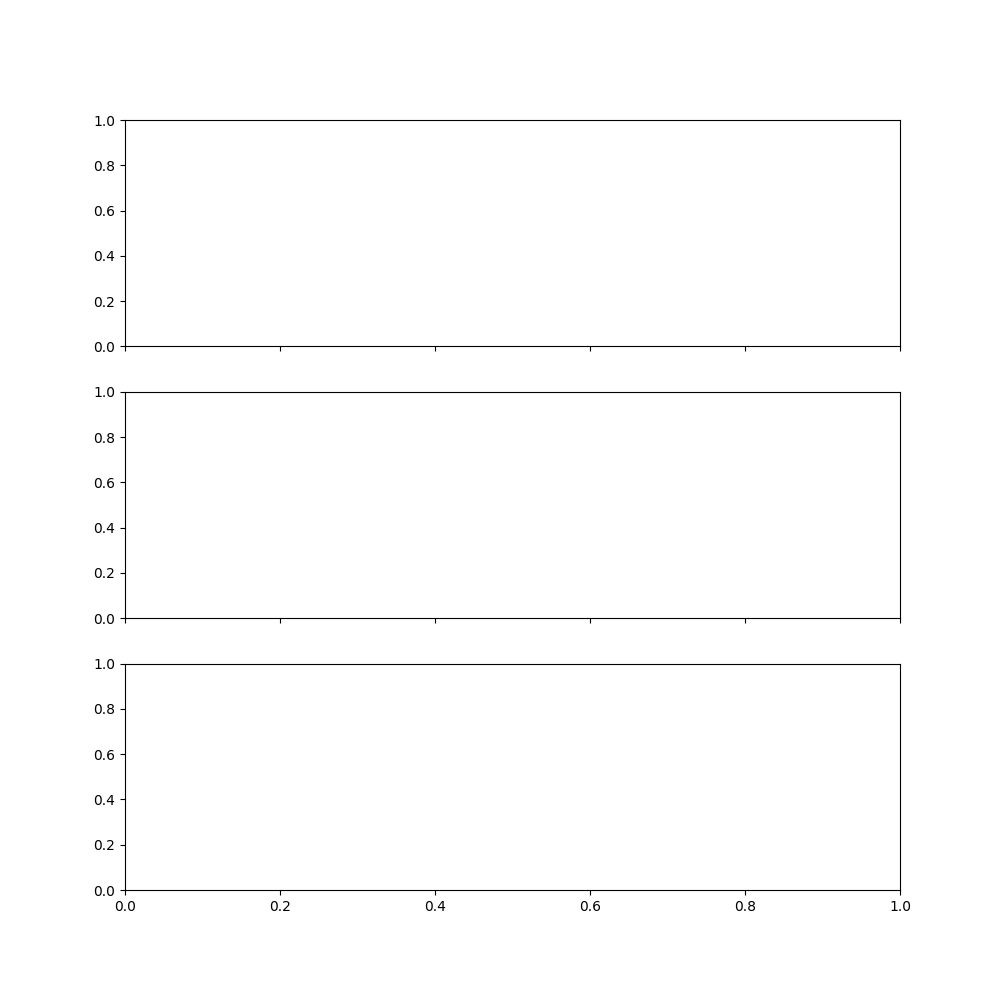

In [6]:
eddy = OpenAEM.Pi_Eddy()
eddy_mirror = eddy.create_mirror()
n = 101
x = np.linspace(-3, 3, 61)
z = np.linspace(0, 2, 21)
X, Z = np.meshgrid(x, z, indexing='ij')

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)

# original eddy
U = np.zeros((61, 21))
W = np.zeros((61, 21))
for i in range(len(x)):
    for k in range(len(z)):
        xv = np.array([x[i], 0.0, z[k]])
        uv = eddy.induced_velocity(xv)
        U[i, k] += uv[0, 0]
        W[i, k] += uv[2, 0]
        
axs[0].quiver(X, Z, U, W, angles='xy', scale_units='xy', scale=20)
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(0, 2)


U_mirror = np.zeros((61, 21))
W_mirror = np.zeros((61, 21))
for i in range(len(x)):
    for k in range(len(z)):
        xv = np.array([x[i], 0.0, z[k]])
        uv = eddy_mirror.induced_velocity(xv)
        U_mirror[i, k] += uv[0, 0]
        W_mirror[i, k] += uv[2, 0]
        
axs[1].quiver(X, Z, U_mirror, W_mirror, angles='xy', scale_units='xy', scale=20)

axs[2].quiver(X, Z, U + U_mirror, W + W_mirror, angles='xy', scale_units='xy', scale=20)

for ax in axs:
    ax.tick_params(direction='in')
    ax.set_xlabel(r'$x/\delta$')
    ax.set_ylabel(r'$z/\delta$')
    ax.set_yticks([0, 0.5, 1.0, 1.5 ,2.0])

In [ ]:
W[:, 0] + W_mirror[:, 0]